# Изучение датасета по раку груди

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
#plt.rcParams["figure.figsize"] = [8, 8]

import warnings
warnings.filterwarnings("ignore")

np.random.seed(100)

## Загружаем данные

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Всего измерено 10 величин, но для каждой высчитано три параметра: среднее, отклонение, худшее (например, *radius_mean*, *radius_se*, *radius_worst*). Итого 30 фич.

Сделаем столбец id индексом:

In [4]:
data.set_index('id',inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

В датасете нет пробелов, заполнять пустые значения не требуется, удалять какие-то строки тоже. Можно удалить последний мусорный столбец.

In [6]:
data.drop('Unnamed: 32',axis=1,inplace=True)

## Базовые статистики

In [7]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

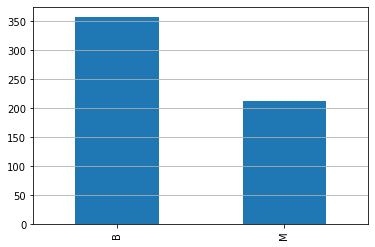

In [9]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

Распределение целевой переменной неравномерно, поэтому метрика Accuracy не подойдёт, будем оценивать через f1_score

In [10]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

## Гистограммы

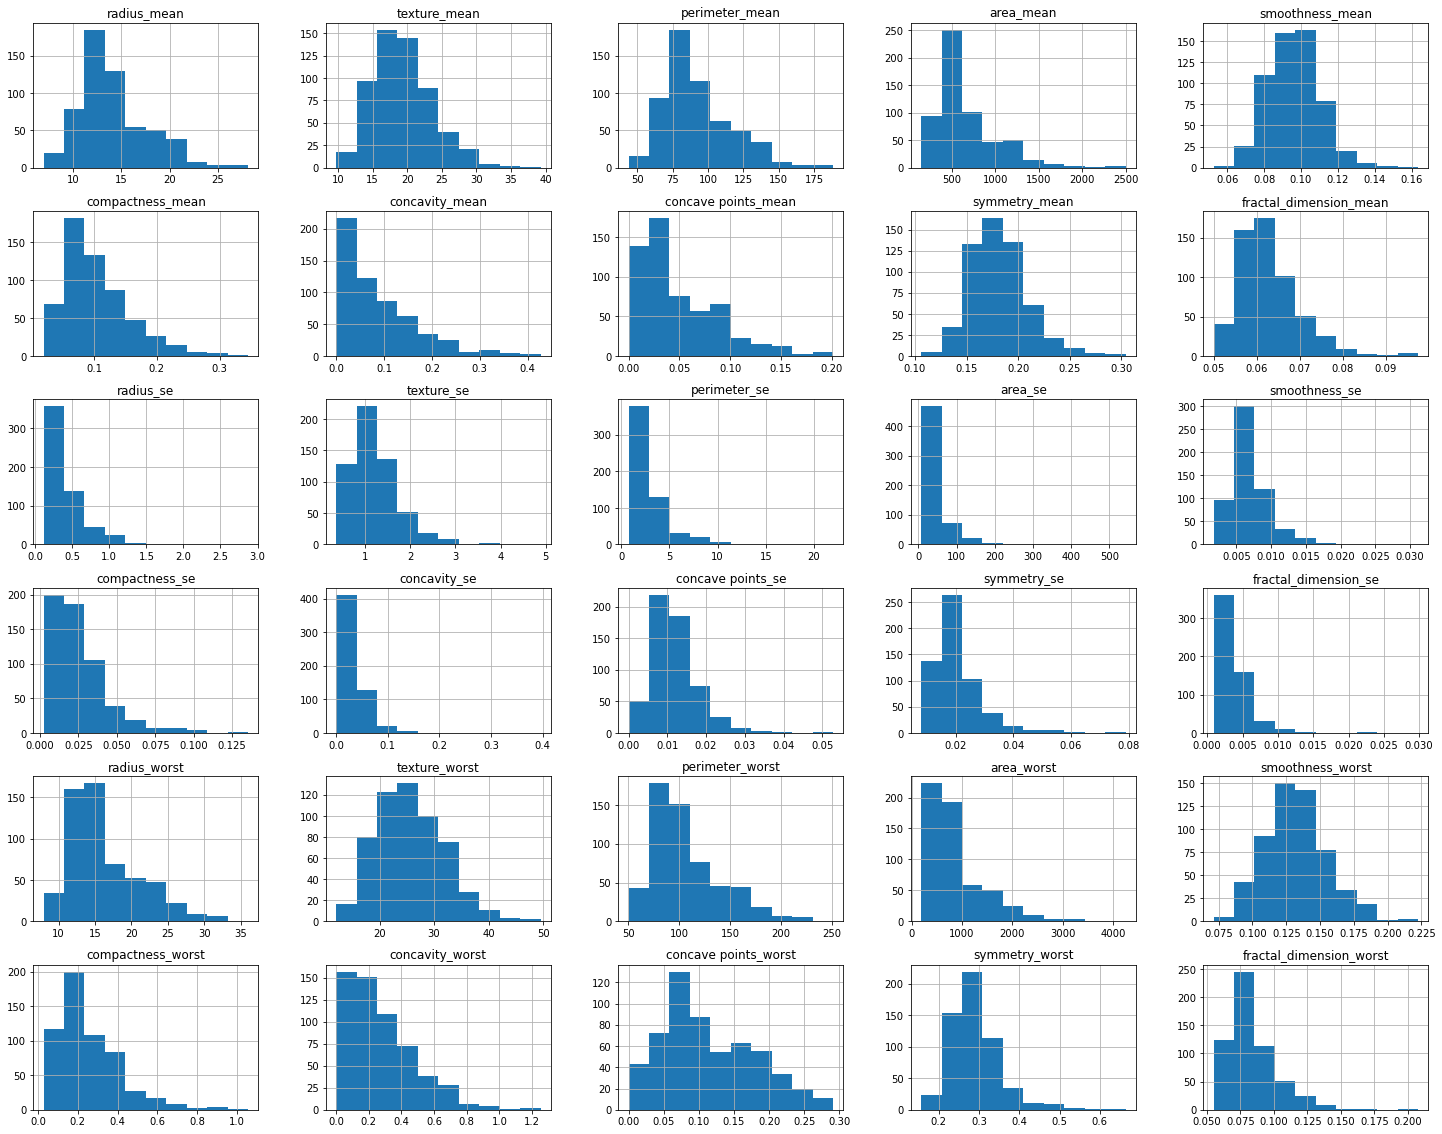

In [11]:
data.hist(figsize=(25, 20));

Простые гистограммы пока особо ничего не говорят.

## Матрица корреляций

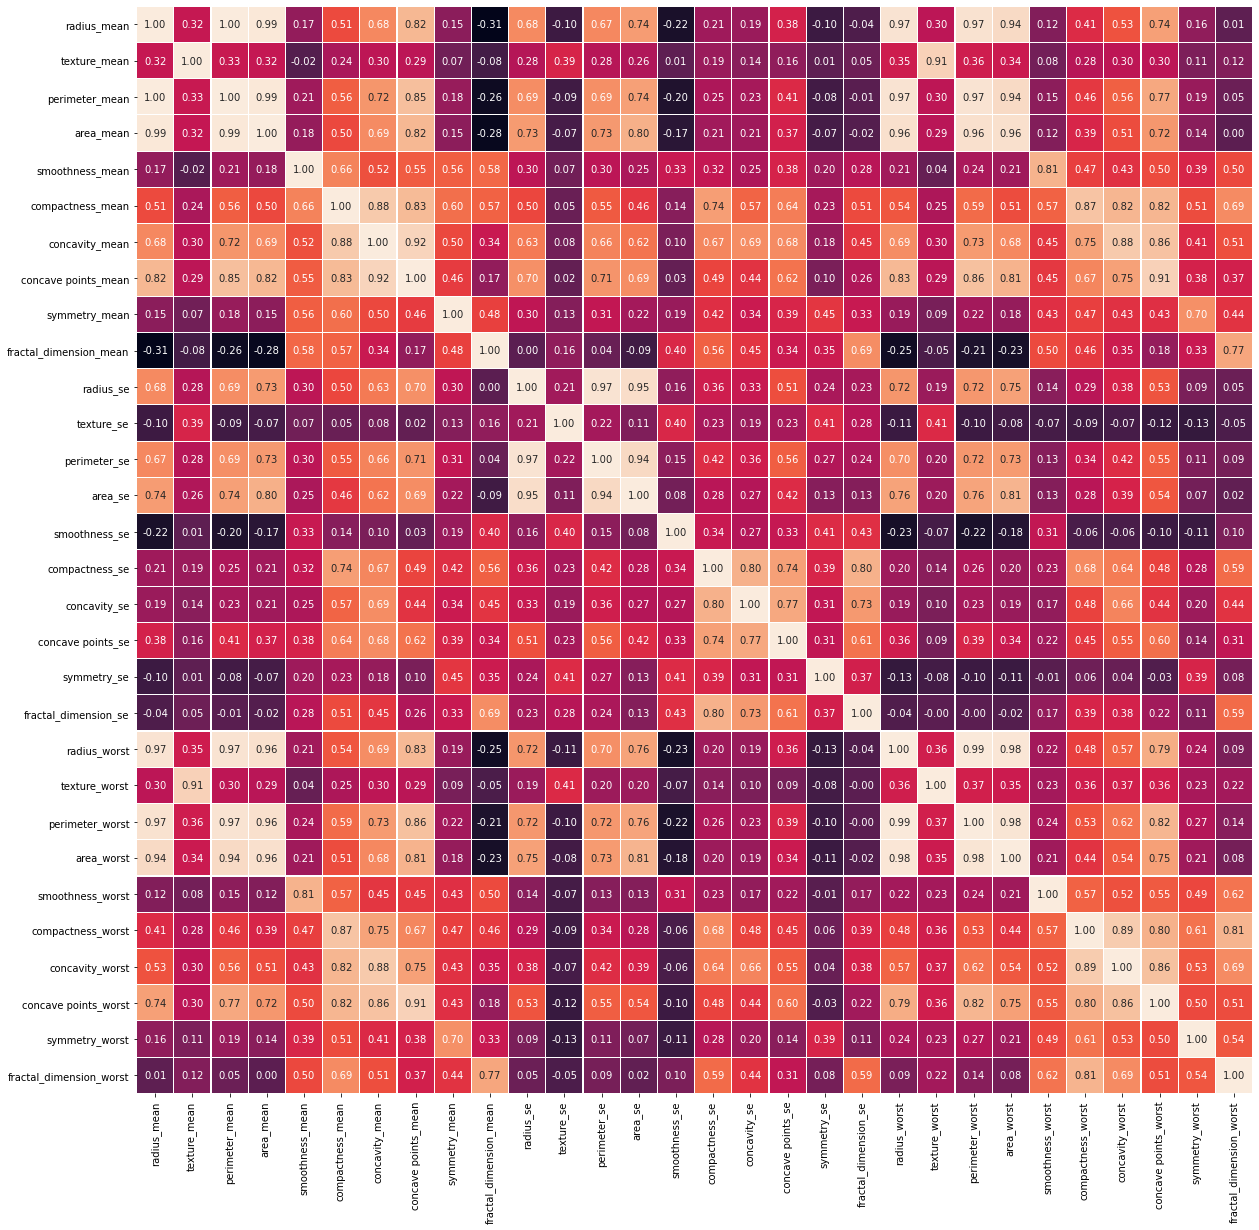

In [12]:
#correlation map
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.1, fmt= '.2f')
plt.show()

Из карты корреляций видно, что между собой очень сильно связаны radius, perimeter и area, что логично, так как эти фичи связаны через геометрические соотношения.

Ещё одна группа хорошо коррелирующих параметров: compactness, concavity, concave_points.

Геометрические параметры, например, radius, хорошо коррелирует с concave_points.

Smoothness лучше всего коррелирует с compactness.

У texture связи ни с чем не наблюдается.

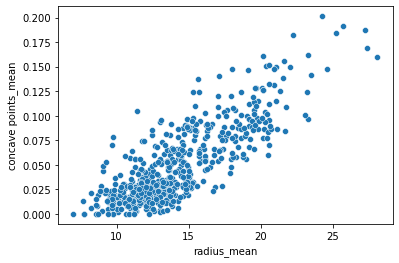

In [13]:
sns.scatterplot(data=data, x='radius_mean', y='concave points_mean');

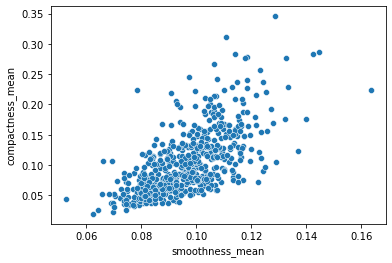

In [14]:
sns.scatterplot(data=data, x='smoothness_mean', y='compactness_mean');

Между radius и concave_points, а также между smoothness и compactness видна линейная зависимость.

Построим попарные графики для ряда фич:

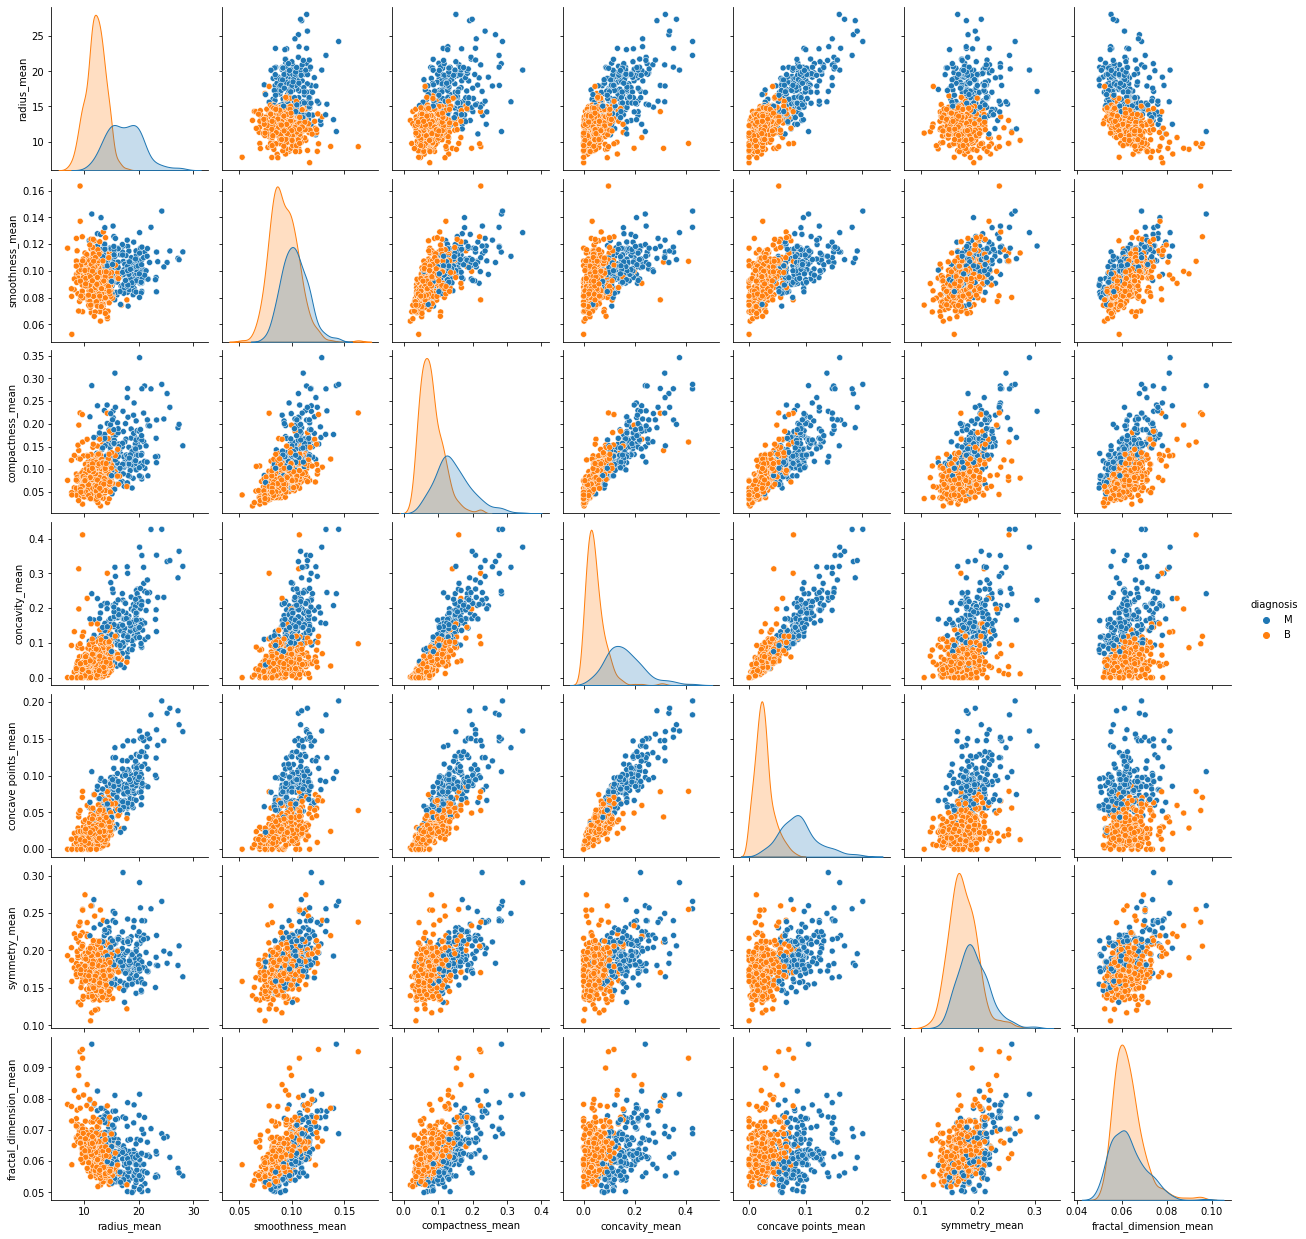

In [15]:
data1 = data[['diagnosis','radius_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]
sns.pairplot(data1, hue='diagnosis');

Построим ящики с усами для некоторых фич:

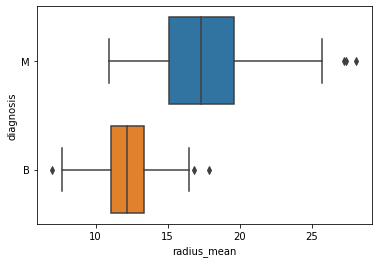

In [16]:
sns.boxplot(x=data['radius_mean'],y=data['diagnosis']);

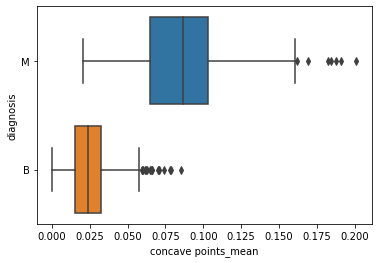

In [17]:
sns.boxplot(x=data['concave points_mean'],y=data['diagnosis']);

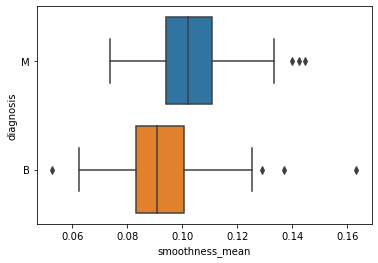

In [18]:
sns.boxplot(x=data['smoothness_mean'],y=data['diagnosis']);

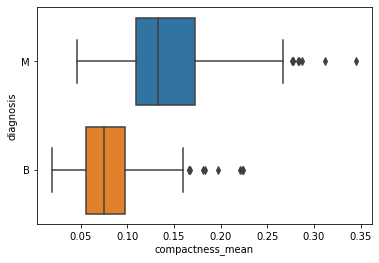

In [19]:
sns.boxplot(x=data['compactness_mean'],y=data['diagnosis']);

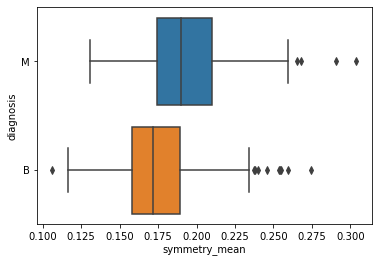

In [20]:
sns.boxplot(x=data['symmetry_mean'],y=data['diagnosis']);

Предположительно, лучше всего отделить классы по radius, compactness, concave_points.

## Преобразуем целевую переменную

In [21]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
data['diagnosis'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

## Разбиение данных на train-test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=100, stratify=data['diagnosis']
)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((398, 30), (171, 30), (398,), (171,))

In [25]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [26]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

## Приведение к одному масштабу

Разные фичи имеют разные диапазоны данных, т.е. масштаб. Чтобы алгоритмы KNN и регрессии работали лучше, нужно привести их к одному масштабу.

При этом для тренировочной выборки применяем метод fit_transform(), который сначала рассчитывает параметры μ и σ, а затем на их основе производит перерасчёт значений (метод Z-score).

Для тестовой выборки только transform(), так как будем использовать уже рассчитанные на предыдущем шаге μ и σ.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Модель KNN без настройки

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
quality(knn.predict(X_test_scaled), y_test)

Accuracy:  0.977
Precision: 0.938
Recall:    1.000
F1-score:  0.968


Показатели очень высокие.

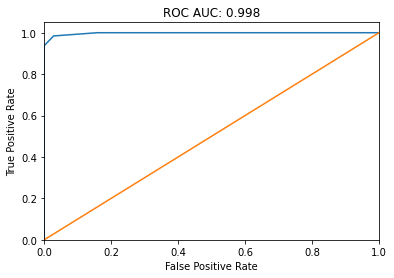

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

# перебираем пороги и ищем для каждого fpr и tpr: 
prediction = knn.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc_score = roc_auc_score(y_test, prediction)
# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(auc_score))
plt.show()

ROC-кривая близка к идеалу.

## Кросс-валидация KNN

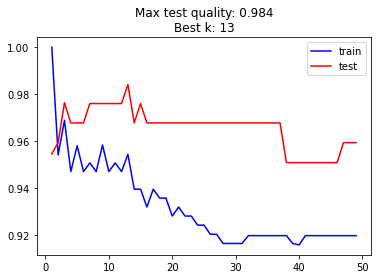

In [32]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

После настройки получаем число соседей 13, f1_score повысился с 0.968 до 0.984.

Поищем с помощью GridSearch:

In [33]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Best CV score: 0.951, best CV k: 5
Resulting test score: 0.976
Wall time: 13.6 s


In [34]:
grid_search.best_estimator_.p

1

Обучение GridSearch дало оптимальное число соседей 5, а p = 1 (Манхэттенская метрика). Однако f1_score меньше, чем при ручной настройке.

In [35]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40)
rand_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
) 

test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Best CV score: 0.922, best CV k: 13
Resulting test score: 0.976
Wall time: 1.45 s


Обучение RandomizedSearch дало такие же результаты, как и GridSearch, но со значительно меньшим временем расчёта.

## Модель логистической регрессии без настройки

In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
quality(log_reg.predict(X_test_scaled), y_test)

Accuracy:  0.977
Precision: 0.984
Recall:    0.955
F1-score:  0.969


Метрики качества сравнимы с метриками KNN.

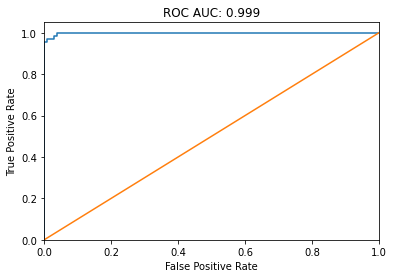

In [37]:
# перебираем пороги и ищем для каждого fpr и tpr: 
prediction = log_reg.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc_score = roc_auc_score(y_test, prediction)
# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(auc_score))
plt.show()

Определим влияние коэффициентов на целевую переменную:

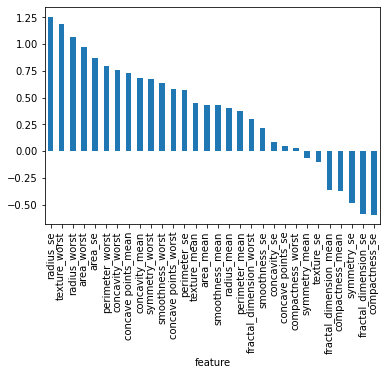

In [38]:
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

Выяснилось, что наибольшее влияние на модель оказывают параметры группы _worst.

## Кросс-валидация логистической регрессии

In [39]:
from sklearn.linear_model import LogisticRegressionCV

log_reg_cv = LogisticRegressionCV(cv=5, scoring='f1')
log_reg_cv.fit(X_train_scaled, y_train)

quality(log_reg_cv.predict(X_test_scaled), y_test)

print("Best CV score: {:.3f}".format(
        log_reg_cv.scores_[1].mean(axis=0).max()))

Accuracy:  0.977
Precision: 0.984
Recall:    0.955
F1-score:  0.969
Best CV score: 0.969


f1_score после настройки не поменялся.

## Проверка гипотезы

Что если оставить в датасете только параметры группы _worst, исключив наиболее скоррелированные признаки (удалим perimeter и area)?

In [40]:
data2 = data.drop(data.columns[1:21],axis=1)
data2 = data2.drop(data2.columns[3:5],axis=1)
data2.head()

,diagnosis,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,
842302,1,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(['diagnosis'], axis=1), data2['diagnosis'], test_size=0.30, random_state=100, stratify=data2['diagnosis']
)

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
log_reg_cv = LogisticRegressionCV(cv=5, scoring='f1')
log_reg_cv.fit(X_train_scaled, y_train)

quality(log_reg_cv.predict(X_test_scaled), y_test)

print("Best CV score: {:.3f}".format(
        log_reg_cv.scores_[1].mean(axis=0).max()))

Accuracy:  0.971
Precision: 0.953
Recall:    0.968
F1-score:  0.961
Best CV score: 0.960


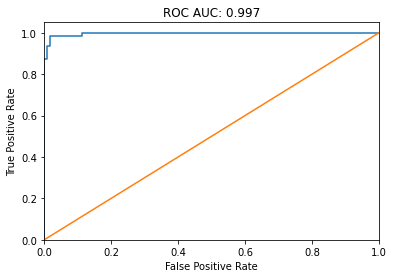

In [44]:
# перебираем пороги и ищем для каждого fpr и tpr: 
prediction = log_reg_cv.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, prediction)
auc_score = roc_auc_score(y_test, prediction)
# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC: {:.3f}'.format(auc_score))
plt.show()

По метрикам видно, что качество немного снизилось.

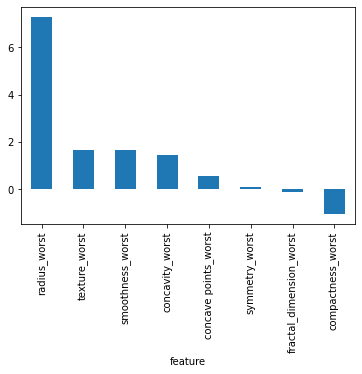

In [60]:
featureImportance = pd.DataFrame({"feature": data2.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg_cv.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

Зато после урезания фич заметно, что на диагноз самое большое влияние оказывает radius. Значительно меньший вклад вносят texture, smootheness, concavity. Остальными характеристиками можно пренебречь.

## Выводы

Для данного датасета модели KNN и логистической регрессии показали одинаковые результаты. Однако по логистической регрессии можно оценить наиболее важные параметры по влиянию на диагноз.